-------
Exploratory Data Analysis
=======
-------

In [1]:
# import libraries we will use
import warnings
warnings.filterwarnings('ignore')

# matplotlib for plotting
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# seaborn for plotting
import seaborn as sns

# pandas for dataframes
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# numpy for linear algebra
import numpy as np

# sklearn for machine learning libraries
from sklearn.linear_model import LogisticRegression

In [2]:
# load training set into a pandas dataframe
data = pd.read_csv('./train.csv')

In [3]:
# view first 5 dataframe rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# statistical view of the numeric columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# replace null fields in age column with median age value
# just an example of processing nulls, will use a more robust stratergy later
data.Age.fillna(data.Age.median(), inplace=True)

In [7]:
# check count to verify nulls have been replaced
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


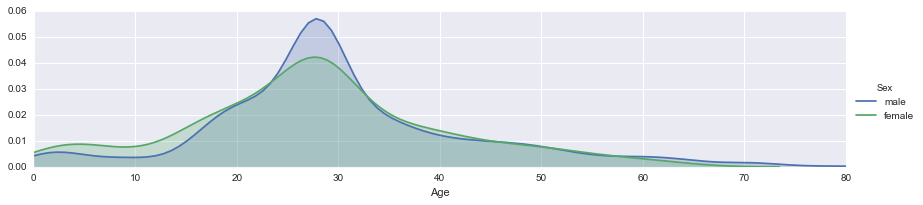

In [8]:
# plot age distribution by gender
fig = sns.FacetGrid(data, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)

# set the x max limit by the oldest passenger
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

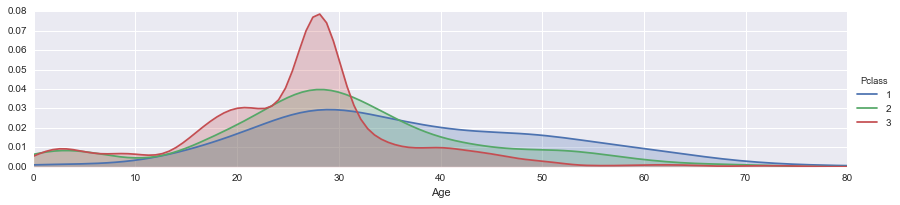

In [9]:
# plot age distribution by passenger class
fig = sns.FacetGrid(data, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)

# set the x max limit by the oldest passenger
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

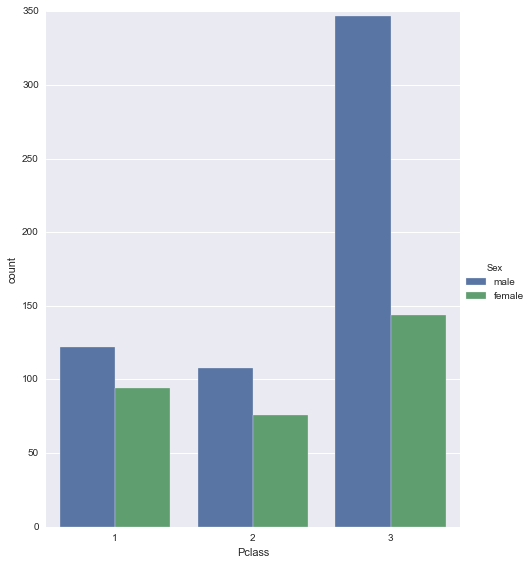

In [10]:
sns.factorplot('Pclass', data=data, hue='Sex', kind='count', size=8, aspect=0.8)

In [11]:
# passengers on each deck
deck = data['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

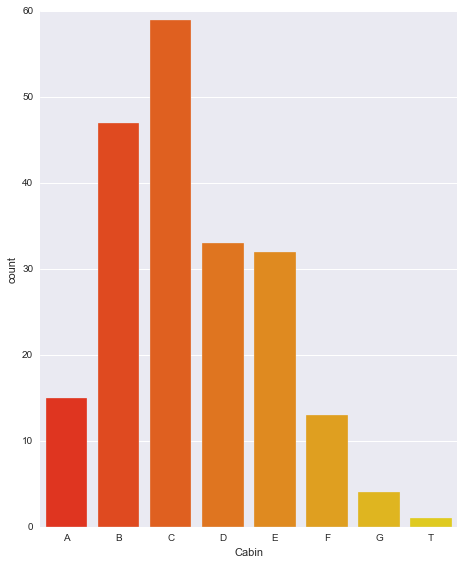

In [12]:
# get first letter of deck to classify its level
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, palette = 'autumn', order = ['A', 'B','C','D','E','F','G','T'], kind='count', 
               size = 8, aspect = 0.8)

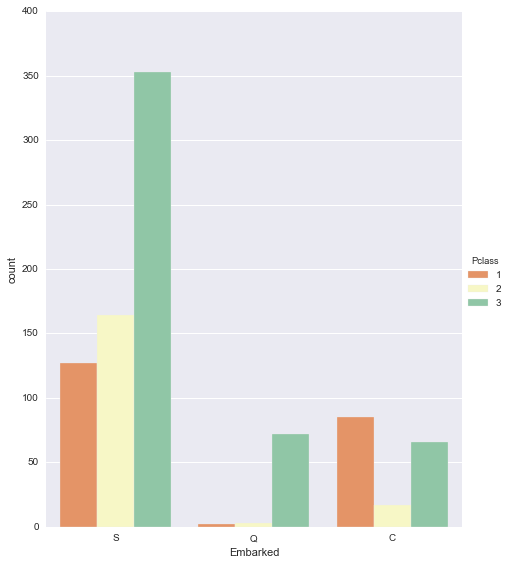

In [13]:
# passenger embarkation locations by passenger class
sns.factorplot('Embarked', data=data, hue='Pclass', x_order=['S','Q','C'], kind='count', palette='Spectral', 
               size = 8, aspect = 0.8)

In [14]:
# find survived/casualties based on gender
survived_sex = data[data.Survived == 1].Sex.value_counts()
print(survived_sex)

dead_sex = data[data.Survived == 0].Sex.value_counts()
print(dead_sex)

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


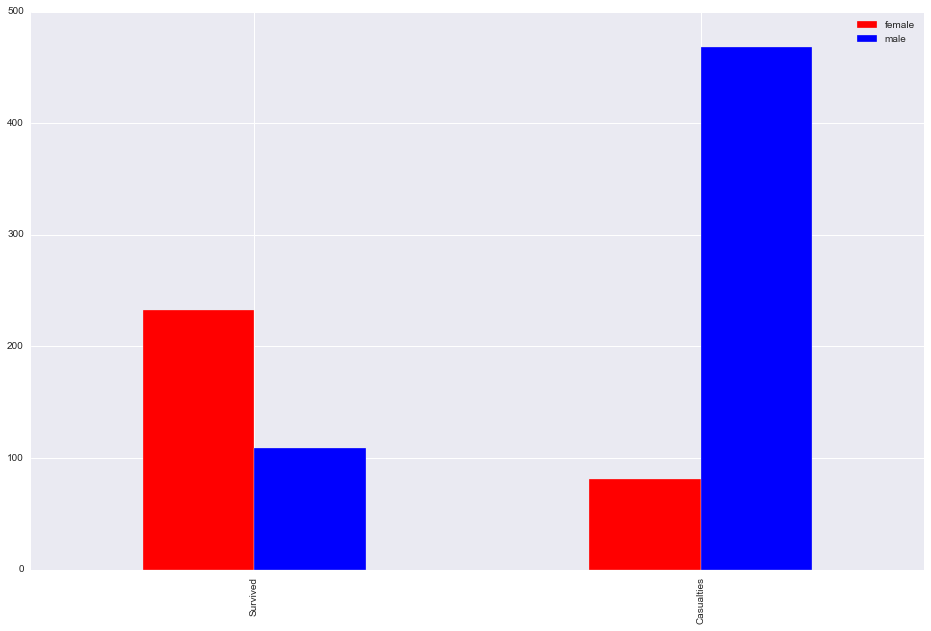

In [15]:
# create a dataframe for gender survival
gen_df = pd.DataFrame([survived_sex, dead_sex],['Survived', 'Casualties'])

# plot barchart for survived/casualties genders
gen_df.plot(kind='bar', figsize=(16,10), color = ['r', 'b'])

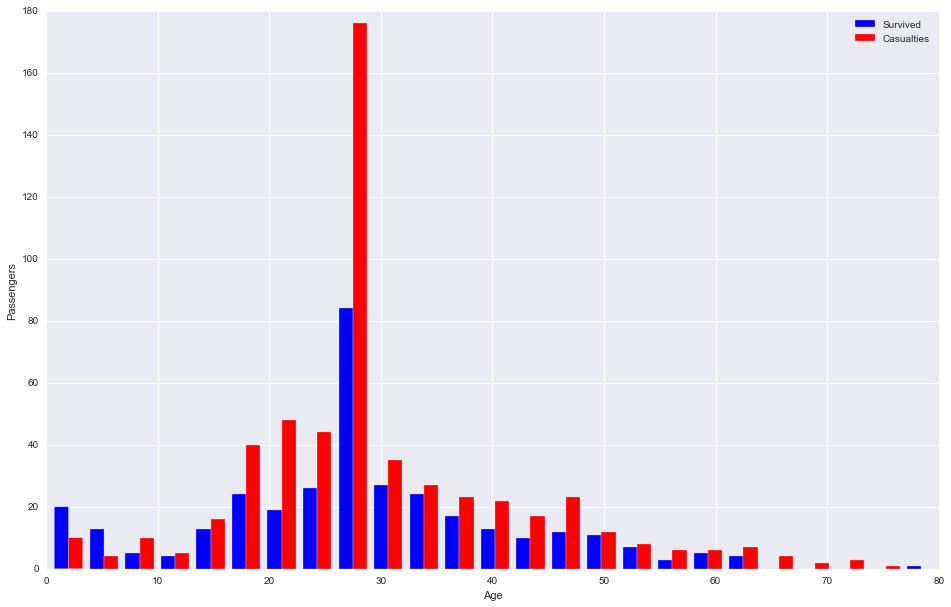

In [16]:
survived_age = data[data.Survived == 1].Age
dead_age = data[data.Survived == 0].Age

# plost histogram for survived/casualties by age
figure = plt.figure(figsize=(16,10))
plt.hist([survived_age, dead_age], bins = 25, label = ['Survived', 'Casualties'], color= ['b','r'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Passengers')


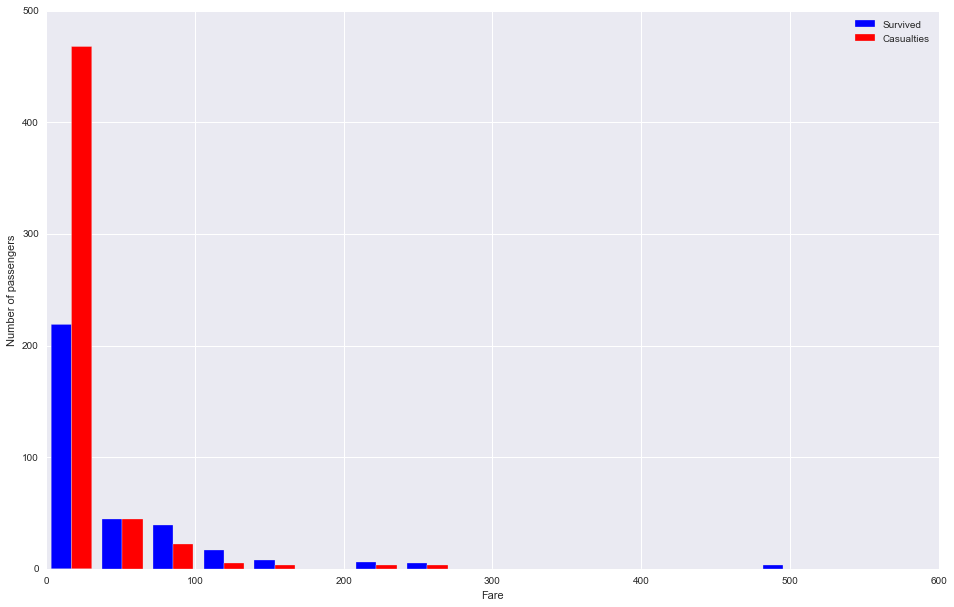

In [17]:
survived_fare = data[data.Survived == 1].Fare
dead_fare = data[data.Survived == 0].Fare

# plost histogram for survived/casualties fares
figure = plt.figure(figsize=(16,10))
plt.hist([survived_fare, dead_fare], color = ['b','r'], bins = 15,label = ['Survived','Casualties'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

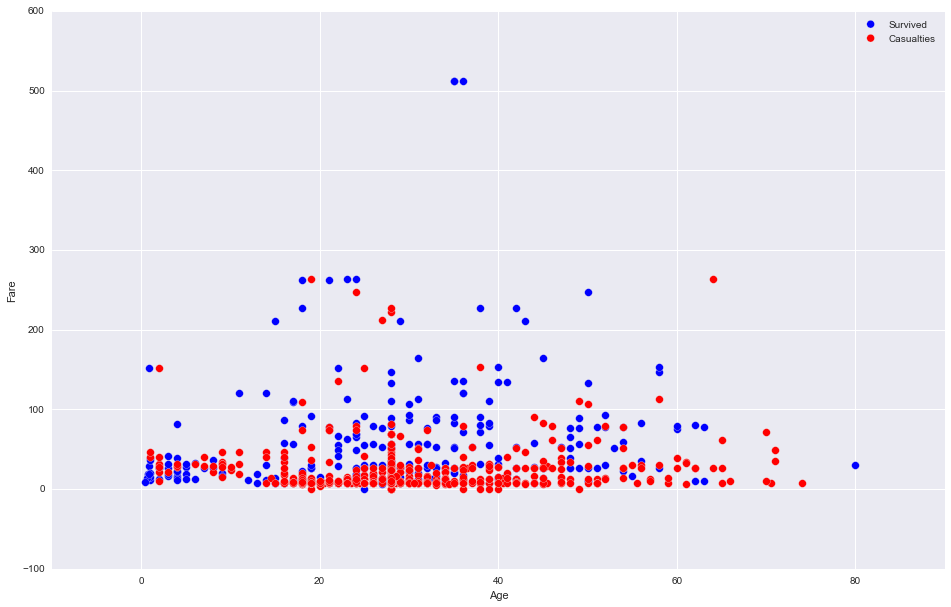

In [18]:
# combine survived/casualties age and fare
figure = plt.figure(figsize=(16,10))
plt.scatter(survived_age, survived_fare, c='b', s=60)
plt.scatter(dead_age, dead_fare, c='r', s=60)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(('Survived','Casualties'),scatterpoints=1,loc='upper right')

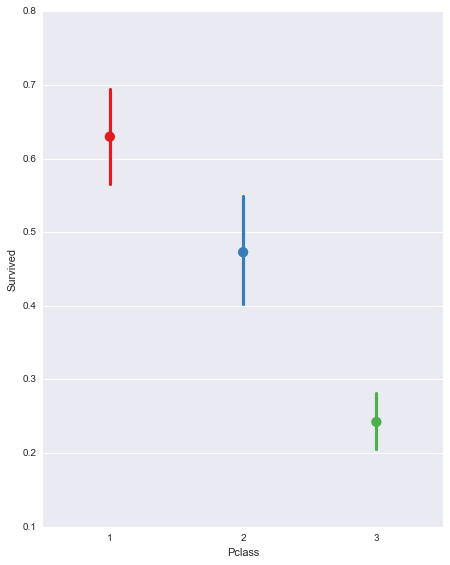

In [19]:
# correlation between passenger class and probability of survival
sns.factorplot('Pclass','Survived', data=data, palette='Set1', size=8, aspect=0.8)

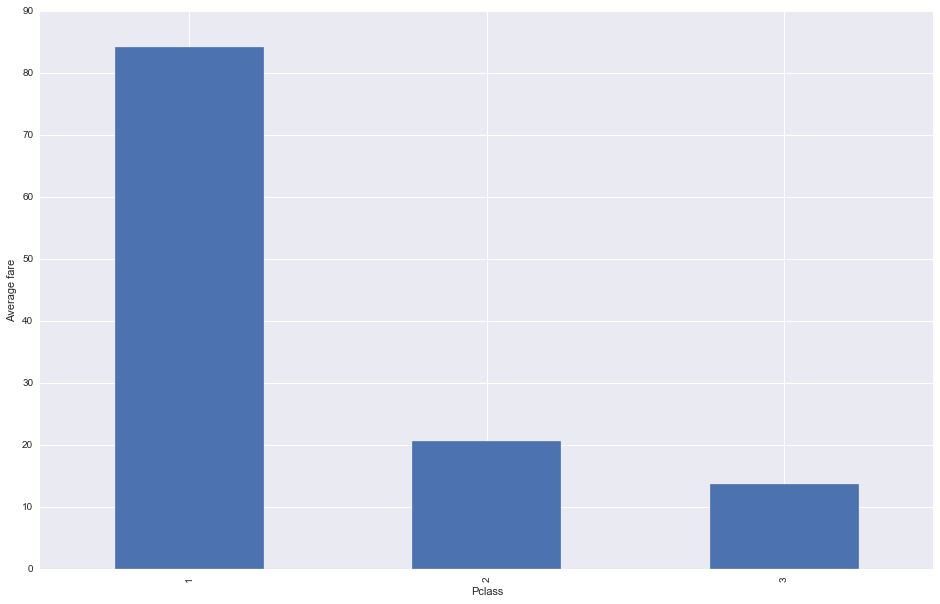

In [20]:
# correaltion between fare and passenger class
figure = plt.figure(figsize=(16,10))
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby(data.Pclass).mean().Fare.plot(kind = 'bar', ax = ax)
# higher fares indicate higher passenger class

---------
Feature Engineering and Processing
=====
--------

In [21]:
# We combine the training and test datasets for feature engineering and processing columns.
# We will split the combined and processed dataset back into train and test sets when we train our model.

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# remove target from train data after saving 
targets = train.Survived
train.drop('Survived', 1, inplace=True)
 
# merge train and test data for processing
combined_df = train.append(test)
    
# reset the index to be continuous for the combined dataframe
combined_df.reset_index(inplace=True)
combined_df.drop('index',inplace=True,axis=1)
    
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# process the age column based on varying median values
combined_df.groupby(['Sex','Pclass']).median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass                                           
female 1               710  36.0      0      0  80.92915
       2               589  28.0      0      0  23.00000
       3               637  22.0      0      0  10.48960
male   1               648  42.0      0      0  49.50420
       2               715  29.5      0      0  13.00000
       3               649  25.0      0      0   7.89580

In [23]:
# define a function to be applied to the dataframe
def calcMissingAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            return 36

        elif row['Sex']=='female' and row['Pclass'] == 2:
            return 28

        elif row['Sex']=='female' and row['Pclass'] == 3:
            return 22

        elif row['Sex']=='male' and row['Pclass'] == 1:
            return 42

        elif row['Sex']=='male' and row['Pclass'] == 2:
            return 29

        elif row['Sex']=='male' and row['Pclass'] == 3:
            return 25
        
combined_df.Age = combined_df.apply(lambda r : calcMissingAges(r) if np.isnan(r.Age) else r.Age, axis = 1)

# check to verify all missing values in Age are column filled
combined_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.256432,0.498854,0.385027,33.295479
std,378.020061,0.837836,13.218278,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,NaN
50%,655.000000,3.000000,26.000000,0.000000,0.000000,NaN
75%,982.000000,3.000000,36.000000,1.000000,0.000000,NaN
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [24]:
# process sex
combined_df.Sex = combined_df.Sex.map({'male':1, 'female':0})
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# we drop the name column for our initial model
combined_df.drop('Name', axis = 1, inplace=True)

In [26]:
# process fare
combined_df.Fare.fillna(combined_df.Fare.mean(), inplace = True)

# check to verify the one null value for Fare is replaced with the mean
combined_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.644003,29.256432,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.478997,13.218278,1.041658,0.865560,51.738879
min,1.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
# process passenger class
# create new passenger class columns for each Pclass
pclass_dummies = pd.get_dummies(combined_df.Pclass, prefix = 'Pclass')
combined_df = pd.concat([combined_df, pclass_dummies], axis = 1)

# drop Pclass column
combined_df.drop('Pclass', axis=1, inplace=True)

In [28]:
# we drop the ticket column for our initial model
combined_df.drop('Ticket', axis = 1, inplace=True)

In [29]:
# process cabin
# replace nulls with U for unknown cabin
combined_df.Cabin.fillna('U', inplace = True)

# create columns for different cabin types
combined_df.Cabin = combined_df.Cabin.map(lambda cabin : cabin[0])
cabin_dummies = pd.get_dummies(combined_df.Cabin, prefix='Cabin')
combined_df = pd.concat([combined_df, cabin_dummies],axis=1)

# drop the Cabin column
combined_df.drop('Cabin', axis=1, inplace=True)


In [30]:
# process family

# create new family size feature 
combined_df['FamilySize'] = combined_df.Parch + combined_df.SibSp + 1
    
# create new family type features
combined_df['Singleton'] = combined_df.FamilySize.map(lambda s : 1 if s == 1 else 0)
combined_df['SmallFamily'] = combined_df.FamilySize.map(lambda s : 1 if 2<=s<=4 else 0)
combined_df['LargeFamily'] = combined_df.FamilySize.map(lambda s : 1 if 5<=s else 0)

In [31]:
# verify new cabin type columns
combined_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,1,0
1,2,0,38.0,1,0,71.2833,C,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
2,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0
3,4,0,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
4,5,1,35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0


In [32]:
# process embarked
# replace two nulls with the most frequent value (S)
combined_df.Embarked.fillna('S', inplace=True)
    
# create new embarked rows for each location
embarked_dummies = pd.get_dummies(combined_df.Embarked,prefix='Embarked')
combined_df = pd.concat([combined_df, embarked_dummies], axis=1)

# drop Embarked column
combined_df.drop('Embarked', axis=1, inplace=True)

In [33]:
# view processed dataframe
combined_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Singleton,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,1,0,0.0,0.0,1.0
1,2,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0,1.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0.0,0.0,1.0
3,4,0,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0,0.0,0.0,1.0
4,5,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0.0,0.0,1.0


In [34]:
# view dataframe dimensions
combined_df.shape

(1309, 25)

In [35]:
# view dataframe infomration
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
PassengerId    1309 non-null int64
Sex            1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Pclass_1       1309 non-null float64
Pclass_2       1309 non-null float64
Pclass_3       1309 non-null float64
Cabin_A        1309 non-null float64
Cabin_B        1309 non-null float64
Cabin_C        1309 non-null float64
Cabin_D        1309 non-null float64
Cabin_E        1309 non-null float64
Cabin_F        1309 non-null float64
Cabin_G        1309 non-null float64
Cabin_T        1309 non-null float64
Cabin_U        1309 non-null float64
FamilySize     1309 non-null int64
Singleton      1309 non-null int64
SmallFamily    1309 non-null int64
LargeFamily    1309 non-null int64
Embarked_C     1309 non-null float64
Embarked_Q     1309 non-null float64
Embarked_S     1309 n

------
Modeling and Predicting
======
------

In [36]:
# seperate the training and test  datasets

targets = pd.read_csv('./train.csv').Survived

train = combined_df.ix[0:890]
test = combined_df.ix[891:]

pids = pd.read_csv('./test.csv').PassengerId

In [37]:
# prepare data to be passed to classifer
survived = targets.values
passId = pids.values
data_test = test.values
data_train = train.values

In [38]:
# classify using logistic regression
model = LogisticRegression()
model.fit(data_train,survived)
predicted = model.predict(data_test)
output = pd.DataFrame(columns=['PassengerId', 'Survived'])
output['PassengerId'] = passId
output['Survived'] = predicted.astype(int)
output.to_csv('logisticRegressionSubmit.csv', index=False)
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         0
20           912         0
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         1
34           926         0
35           927         0
3